# Image Identification with keras

## MNIST Dataset

* Importing DataSet

In [33]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image
from tensorflow.keras.datasets import mnist

In [2]:
data = mnist.load_data()

In [3]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
var = np.array(data)

C:\Users\hashi\AppData\Local\Temp\ipykernel_11396\1565745167.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  var = np.array(data)


In [5]:
print("Train Images :",var[0,0].shape)
print("Train Labels :",var[0,1].shape)
print("Test Images :",var[1,0].shape)
print("Test Labels :",var[1,1].shape)


Train Images : (60000, 28, 28)
Train Labels : (60000,)
Test Images : (10000, 28, 28)
Test Labels : (10000,)


In [6]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [7]:
display(train_images.shape)
display(train_labels.shape)
display(test_images.shape)
display(test_labels.shape)

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

In [8]:
train_labels = np.array(train_labels)
np.unique(train_labels)
print(train_labels)

[5 0 4 ... 5 6 8]


In [9]:
test_labels = np.array(test_labels)
np.unique(test_labels)
print(test_labels)

[7 2 1 ... 4 5 6]


## Plotting Images

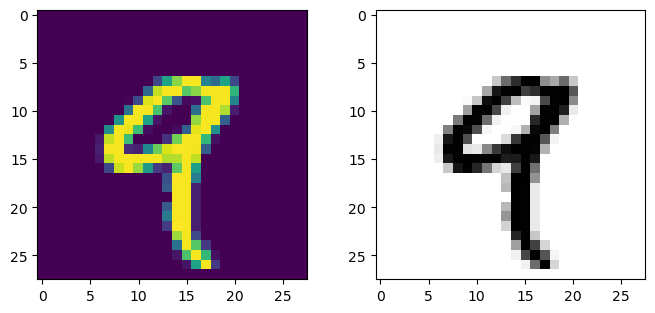

In [10]:
fig, ax = plt.subplots(1,2,figsize = (8,3.5))
ax[0].imshow(train_images[4])
ax[1].imshow(train_images[4],cmap = plt.cm.binary)

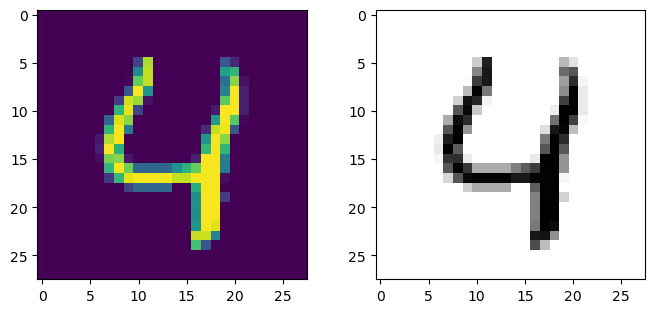

In [11]:
fig, ax = plt.subplots(1,2,figsize = (8,3.5))
ax[0].imshow(test_images[4])
ax[1].imshow(test_images[4],cmap = plt.cm.binary)

## Creating Network Architecture

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation= "relu",input_shape=(28*28,)))
network.add(layers.Dense(10,activation = "softmax"))

In [13]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## Image Data

In [14]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float64')
print(type(train_images))
train_images.dtype
train_images.shape

<class 'numpy.ndarray'>


(60000, 784)

In [15]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float64')
print(type(test_images))
test_images.dtype

<class 'numpy.ndarray'>


dtype('float64')

## One Hot Encoding

In [16]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [17]:
from tensorflow.keras.utils import to_categorical
test_labels = to_categorical(test_labels)
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Training

In [18]:
network.fit(train_images,train_labels, epochs=5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 15s 30ms/step - loss: 5.9655 - accuracy: 0.8975
Epoch 2/5
469/469 [==============================] - 15s 33ms/step - loss: 0.6470 - accuracy: 0.9512
Epoch 3/5
469/469 [==============================] - 13s 28ms/step - loss: 0.4413 - accuracy: 0.9633
Epoch 4/5
469/469 [==============================] - 15s 31ms/step - loss: 0.3586 - accuracy: 0.9711
Epoch 5/5
469/469 [==============================] - 13s 28ms/step - loss: 0.2848 - accuracy: 0.9764


In [19]:
(test_loss, test_acc) = network.evaluate(test_images,test_labels)
print(test_acc)
print(test_loss)

313/313 [==============================] - 4s 8ms/step - loss: 0.7287 - accuracy: 0.9607
0.9606999754905701
0.7287068367004395


In [20]:
prediction = network.predict(test_images)

313/313 [==============================] - 3s 7ms/step


In [21]:
prediction[0]
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [26]:
pred_images = test_images.reshape(10000,28,28)

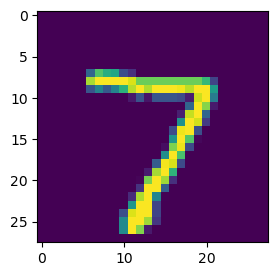

In [27]:
fig, ax = plt.subplots(figsize = (3,3))
plt.imshow(pred_images[0])